# Evaluation

In [549]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [317]:
queries_indexes_df = pd.read_pickle("./queries_indexes_df.pkl")

In [318]:
queries_indexes_df

,Query ID,Song ID,pitch_diff-ngram_5_set_index,UpSameDown-ngram_5_set_index,pitch_diff-ngram_8_set_index,UpSameDown-ngram_8_set_index,pitch_diff-ngram_10_set_index,UpSameDown-ngram_10_set_index,pitch_diff-ngram_12_set_index,UpSameDown-ngram_12_set_index,...,UpSameDown-ngram_12_set_hll_12_index,UpSameDown-ngram_12_set_hll_16_index,pitch_diff-multi_gram_5_10_set_hll_4_index,pitch_diff-multi_gram_5_10_set_hll_8_index,pitch_diff-multi_gram_5_10_set_hll_12_index,pitch_diff-multi_gram_5_10_set_hll_16_index,UpSameDown-multi_gram_5_10_set_hll_4_index,UpSameDown-multi_gram_5_10_set_hll_8_index,UpSameDown-multi_gram_5_10_set_hll_12_index,UpSameDown-multi_gram_5_10_set_hll_16_index
0,q1,1118,400,427,398,406,398,398,398,398,...,164,127,439,266,210,141,115,151,341,450
1,q2,1438,14,113,60,102,60,179,60,113,...,432,389,26,331,289,390,399,166,133,100
2,q3,1546,62,10,7,33,7,166,7,29,...,468,62,3,270,446,14,85,8,17,10
3,q4,1579,17,71,32,76,30,98,30,81,...,307,113,183,416,332,269,396,17,63,63
4,q5,1808,1,146,193,204,193,307,193,207,...,331,299,153,101,38,1,415,100,143,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,q114,479,1,69,283,21,283,45,283,257,...,8,410,23,77,39,6,140,77,16,29
114,q115,1747,211,93,205,61,205,180,205,250,...,205,432,181,198,52,139,145,269,108,67
115,q116,2024,228,460,210,314,210,185,210,245,...,307,105,195,250,328,381,90,423,444,443
116,q117,281,335,329,333,396,333,333,333,333,...,333,333,337,383,432,168,443,469,432,453


In [319]:
# non_vocals_song_ids = [1081,126,1212, 1536, 1655, 995,1786]

In [320]:
# queries_indexes_df[~queries_indexes_df['Song ID'].isin(non_vocals_song_ids)]

In [294]:
# load results from each experiment
# split queries in 10 sets
# calculate MRR for each set
# apply statistical tests t-test or Mann-Whitney 

# check memory usage in hll and sets representations
# apply statistical tests t-test or Mann-Whitney for memory usage

In [321]:
shuffled = queries_indexes_df.sample(frac=1, random_state=9283)
splits = np.array_split(shuffled, 10)  

In [322]:
for s in splits:
    print(f"size_split:{len(s)}")

size_split:12
size_split:12
size_split:11
size_split:11
size_split:11
size_split:11
size_split:11
size_split:11
size_split:11
size_split:11


In [297]:
def inverse(num):
    return 1.0/num

def get_mrr(rank_list):
    result = {}
    ranks = rank_list[np.logical_not(np.isnan(rank_list))]
    inverted_ranks = inverse(ranks)
    result["mrr"] = inverted_ranks.mean()
    result["count"] = len(inverted_ranks)
    return result


In [298]:
cols_indexes = list(queries_indexes_df.columns)
cols_indexes.remove('Song ID')
cols_indexes.remove('Query ID')

In [299]:
results = []
for index, split in enumerate(splits):
    for col_index in cols_indexes:
        mrr = get_mrr(split[col_index])
        results.append({"split":index,"col_index":col_index,"mrr":mrr['mrr']})
results_df = pd.DataFrame.from_records(results)

In [300]:
results_df

,split,col_index,mrr
0,0,pitch_diff-ngram_5_set_index,0.137593
1,0,UpSameDown-ngram_5_set_index,0.008553
2,0,pitch_diff-ngram_8_set_index,0.027153
3,0,UpSameDown-ngram_8_set_index,0.011316
4,0,pitch_diff-ngram_10_set_index,0.029648
...,...,...,...
495,9,pitch_diff-multi_gram_5_10_set_hll_16_index,0.009683
496,9,UpSameDown-multi_gram_5_10_set_hll_4_index,0.035734
497,9,UpSameDown-multi_gram_5_10_set_hll_8_index,0.011755
498,9,UpSameDown-multi_gram_5_10_set_hll_12_index,0.024068


In [301]:
def get_set_type(s):
    return s.split("_set_")[0]+""
results_df['set_type'] = results_df['col_index'].apply(get_set_type)

In [302]:
def get_similarity_methods_from_index(s:str):
    if("set_index" in s):
        return 'baseline'
    return s.split('_set_')[1].replace("_index","")

results_df['similarity_method'] = results_df['col_index'].apply(get_similarity_methods_from_index)

In [303]:
results_df.head()

,split,col_index,mrr,set_type,similarity_method
0,0,pitch_diff-ngram_5_set_index,0.137593,pitch_diff-ngram_5,baseline
1,0,UpSameDown-ngram_5_set_index,0.008553,UpSameDown-ngram_5,baseline
2,0,pitch_diff-ngram_8_set_index,0.027153,pitch_diff-ngram_8,baseline
3,0,UpSameDown-ngram_8_set_index,0.011316,UpSameDown-ngram_8,baseline
4,0,pitch_diff-ngram_10_set_index,0.029648,pitch_diff-ngram_10,baseline


In [304]:
results_df.pivot(columns='set_type', index=["split","similarity_method"], values='mrr')

set_type                 UpSameDown-multi_gram_5_10  UpSameDown-ngram_10  \
split similarity_method                                                    
0     baseline                             0.012246             0.008609   
      hll_12                               0.011658             0.009401   
      hll_16                               0.012046             0.012107   
      hll_4                                0.003357             0.008297   
      hll_8                                0.007343             0.021050   
1     baseline                             0.007893             0.020359   
      hll_12                               0.010253             0.022347   
      hll_16                               0.008417             0.020175   
      hll_4                                0.006543             0.005852   
      hll_8                                0.005379             0.006963   
2     baseline                             0.006730             0.007147   
      hll_12                               0.007743             0.006553   
      hll_16                               0.006590             0.007025   
      hll_4                                0.008400             0.005339   
      hll_8                                0.006110             0.008330   
3     baseline                             0.044005             0.016341   
      hll_12                               0.026610             0.011652   
      hll_16                               0.038000             0.016844   
      hll_4                                0.006087             0.011758   
      hll_8                                0.019597             0.024080   
4     baseline                             0.006262             0.007369   
      hll_12                               0.009102             0.006459   
      hll_16                               0.006414             0.008687   
      hll_4                                0.013071             0.007181   
      hll_8                                0.009492             0.006014   
5     baseline                             0.022672             0.005177   
      hll_12                               0.016187             0.003493   
      hll_16                               0.023281             0.003551   
      hll_4                                0.037049             0.013039   
      hll_8                                0.014021             0.008448   
6     baseline                             0.022747             0.057898   
      hll_12                               0.021229             0.049346   
      hll_16                               0.021645             0.055818   
      hll_4                                0.017044             0.018795   
      hll_8                                0.018973             0.011309   
7     baseline                             0.014731             0.013956   
      hll_12                               0.017745             0.015495   
      hll_16                               0.015871             0.016043   
      hll_4                                0.018631             0.015854   
      hll_8                                0.024135             0.013541   
8     baseline                             0.115945             0.103545   
      hll_12                               0.111622             0.051313   
      hll_16                               0.116061             0.098737   
      hll_4                                0.007240             0.011687   
      hll_8                                0.031142             0.018590   
9     baseline                             0.027077             0.019903   
      hll_12                               0.024068             0.016336   
      hll_16                               0.027901             0.018045   
      hll_4                                0.035734             0.009203   
      hll_8                                0.011755             0.006696   

set_type                 UpSameDown-ngram_12  U

In [327]:
results_df.pivot_table(columns='set_type', index=["similarity_method"], values='mrr',aggfunc='mean').transpose().sort_values(by='baseline', ascending=False)

similarity_method,baseline,hll_12,hll_16,hll_4,hll_8
set_type,,,,,
pitch_diff-ngram_5,0.141676,0.065766,0.144133,0.022431,0.011362
pitch_diff-multi_gram_5_10,0.134536,0.031296,0.074247,0.018156,0.016280
pitch_diff-ngram_8,0.036361,0.032898,0.024172,0.014829,0.013728
pitch_diff-ngram_10,0.035790,0.018179,0.029335,0.026130,0.023154
pitch_diff-ngram_12,0.035790,0.037635,0.029146,0.027959,0.014678
UpSameDown-multi_gram_5_10,0.028031,0.025622,0.027623,0.015316,0.014795
UpSameDown-ngram_10,0.026030,0.019239,0.025703,0.010700,0.012502
UpSameDown-ngram_8,0.025066,0.031535,0.024937,0.017932,0.014168
UpSameDown-ngram_12,0.024538,0.028325,0.024994,0.009732,0.016555


In [362]:
results_t_test = []
for g in list(results_df['set_type'].unique()):
    g_df = results_df[results_df["set_type"] == g]
    baseline_key = g+"_set_index"
    baseline_mmr = g_df[g_df['col_index']==baseline_key]['mrr'].tolist()
    for col_index in list(g_df['col_index'].unique()):
        if(col_index != baseline_key):
            col_index_mmr = g_df[g_df['col_index']==col_index]['mrr'].tolist()
            res = stats.ttest_rel(np.array(baseline_mmr),col_index_mmr, alternative='greater')
            mean_mrr = np.mean(col_index_mmr)
            mean_baseline_mrr = np.mean(baseline_mmr)
            results_t_test.append({'p_value':res.pvalue,
                                    'set_type':g,
                                   'similarity_method': get_similarity_methods_from_index(col_index),
                                   'col_index':col_index,
                                   'mean_mrr':mean_mrr,
                                   'mean_baseline_mrr':mean_baseline_mrr})
results_t_test_df = pd.DataFrame.from_records(results_t_test)
results_t_test_df['reject_nh'] = results_t_test_df['p_value']<=0.05
results_t_test_df.sort_values(by=["mean_baseline_mrr", "mean_mrr"], ascending=False)

,p_value,set_type,similarity_method,col_index,mean_mrr,mean_baseline_mrr,reject_nh
3,0.567506,pitch_diff-ngram_5,hll_16,pitch_diff-ngram_5_set_hll_16_index,0.144133,0.141676,False
2,0.013417,pitch_diff-ngram_5,hll_12,pitch_diff-ngram_5_set_hll_12_index,0.065766,0.141676,True
0,0.002757,pitch_diff-ngram_5,hll_4,pitch_diff-ngram_5_set_hll_4_index,0.022431,0.141676,True
1,0.000936,pitch_diff-ngram_5,hll_8,pitch_diff-ngram_5_set_hll_8_index,0.011362,0.141676,True
35,0.002279,pitch_diff-multi_gram_5_10,hll_16,pitch_diff-multi_gram_5_10_set_hll_16_index,0.074247,0.134536,True
34,0.004979,pitch_diff-multi_gram_5_10,hll_12,pitch_diff-multi_gram_5_10_set_hll_12_index,0.031296,0.134536,True
32,0.000942,pitch_diff-multi_gram_5_10,hll_4,pitch_diff-multi_gram_5_10_set_hll_4_index,0.018156,0.134536,True
33,0.001272,pitch_diff-multi_gram_5_10,hll_8,pitch_diff-multi_gram_5_10_set_hll_8_index,0.016280,0.134536,True
10,0.399318,pitch_diff-ngram_8,hll_12,pitch_diff-ngram_8_set_hll_12_index,0.032898,0.036361,False
11,0.005777,pitch_diff-ngram_8,hll_16,pitch_diff-ngram_8_set_hll_16_index,0.024172,0.036361,True


In [306]:
df = results_df.groupby(["similarity_method","set_type"])["mrr"].mean().to_frame().reset_index().sort_values(by=["similarity_method","set_type"])

<Axes: xlabel='mrr', ylabel='set_type'>

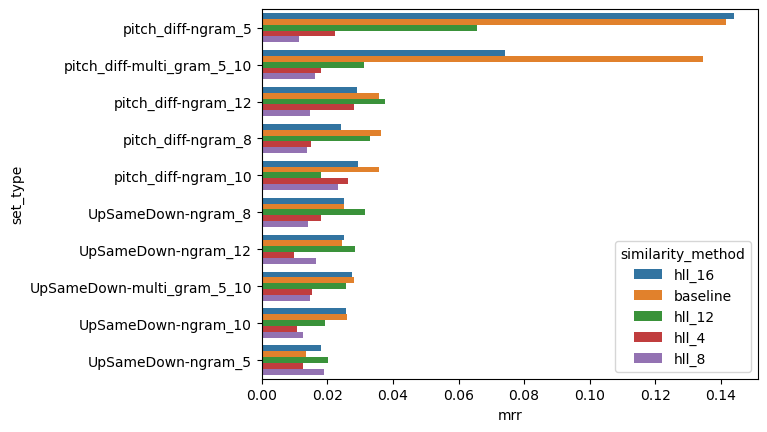

In [323]:
import seaborn as sns
sns.barplot(data=df.sort_values(by=["mrr"], ascending=False), y='set_type', x='mrr', hue='similarity_method')

## Analysing HLL estimation

In [364]:
cross_df = pd.read_pickle("./checkpoint/similarity_UpSameDown-multi_gram_5_10_set_hll_16.pkl")

Text(0.5, 1.0, 'Similarity Baseline vs HLL16')

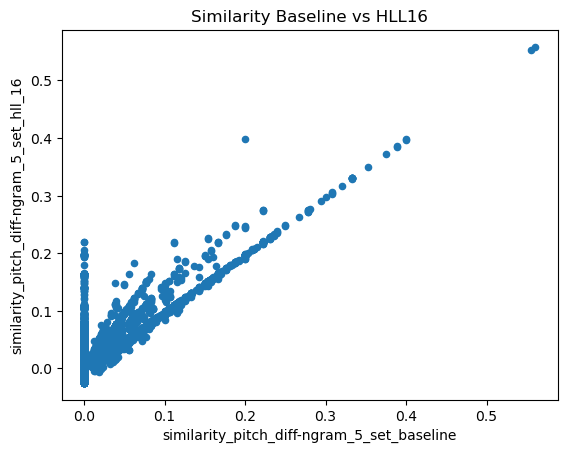

In [397]:
cross_df.plot.scatter(x='similarity_pitch_diff-ngram_5_set_baseline',y='similarity_pitch_diff-ngram_5_set_hll_16').set_title("Similarity Baseline vs HLL16")

Text(0.5, 1.0, 'Similarity Baseline vs HLL12')

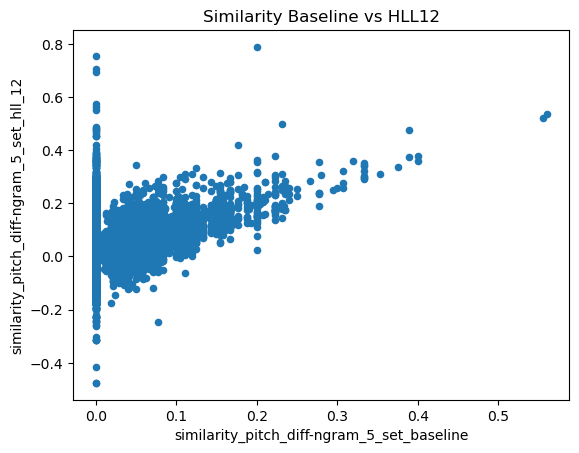

In [396]:
cross_df.plot.scatter(x='similarity_pitch_diff-ngram_5_set_baseline',y='similarity_pitch_diff-ngram_5_set_hll_12').set_title("Similarity Baseline vs HLL12")

Text(0.5, 1.0, 'Similarity Baseline vs HLL8')

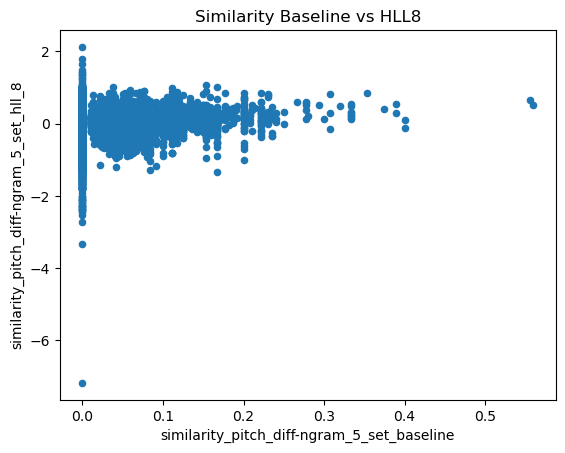

In [395]:
cross_df.plot.scatter(x='similarity_pitch_diff-ngram_5_set_baseline',y='similarity_pitch_diff-ngram_5_set_hll_8').set_title("Similarity Baseline vs HLL8")

Text(0.5, 1.0, 'Similarity Baseline vs HLL4')

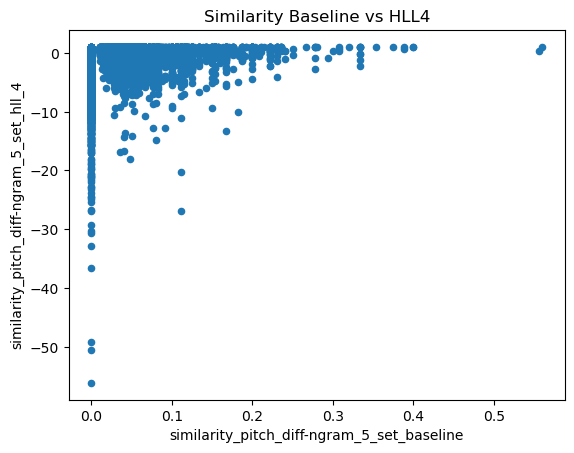

In [394]:
cross_df.plot.scatter(x='similarity_pitch_diff-ngram_5_set_baseline',y='similarity_pitch_diff-ngram_5_set_hll_4').set_title("Similarity Baseline vs HLL4")

In [398]:
queries_sets_hll_df = pd.read_pickle("./queries_set_hll.pkl")
songs_sets_hll_df = pd.read_pickle("./songs_set_hll.pkl")

In [442]:
cross_df = queries_sets_hll_df[["Query ID"]].merge(songs_sets_hll_df[["Song ID"]], how="cross")

In [443]:
import copy

def get_merged_hll(hll1, hll2):
    m_hll = copy.copy(hll1)
    m_hll.update(hll2)
    return m_hll

def append_set_size(s):
    return len(s)

def card_estimation(hll):
    return hll.card()

def append_size_estimations(df, col_set, hll_p):
    df[col_set+"_size"] = df[col_set].apply(append_set_size)
    df[f"{col_set}_card_estimation_{hll_p}"] = df[f"{col_set}_hll_{hll_p}"].apply(card_estimation)
    return df



def get_cross_for_hll(col_set, hll_p):
    hll_col = f"{col_set}_hll_{hll_p}"
    q_df = queries_sets_hll_df[["Query ID",col_set, hll_col]].copy()
    s_df = songs_sets_hll_df[["Song ID",col_set, hll_col]].copy()
    
    q_df = append_size_estimations(q_df, col_set, hll_p)
    s_df = append_size_estimations(s_df, col_set, hll_p)
    
    def get_union_size(queryId,songId):
        q_data = q_df[q_df["Query ID"] == queryId].iloc[0]
        s_data = s_df[s_df["Song ID"] == songId].iloc[0]
        return len(q_data[col_set].union(s_data[col_set]))
    
    def get_intersection_size(queryId,songId, union_size):
        q_data = q_df[q_df["Query ID"] == queryId].iloc[0]
        s_data = s_df[s_df["Song ID"] == songId].iloc[0]
        return q_data[col_set+'_size'] + s_data[col_set+'_size'] - union_size
    
    def get_similarity(queryId,intersection_size):
        q_data = q_df[q_df["Query ID"] == queryId].iloc[0]
        return intersection_size/q_data[col_set+"_size"]
    
    def get_similarity_estimation(queryId,intersection_estimation):
        q_data = q_df[q_df["Query ID"] == queryId].iloc[0]
        return intersection_estimation/q_data[hll_col].card()
    
    def get_union_estimation(queryId,songId):
        q_data = q_df[q_df["Query ID"] == queryId].iloc[0]
        s_data = s_df[s_df["Song ID"] == songId].iloc[0]
        m_hll = get_merged_hll(q_data[hll_col],s_data[hll_col])
        return m_hll.card()
    
    def get_intersection_estimation(queryId,songId, union_estimation):
        q_data = q_df[q_df["Query ID"] == queryId].iloc[0]
        s_data = s_df[s_df["Song ID"] == songId].iloc[0]
        return q_data[hll_col].card() + s_data[hll_col].card() - union_estimation
    
    hll_cross_df = cross_df.copy()
    hll_cross_df["union_size"] = hll_cross_df.apply(lambda r:get_union_size(r["Query ID"],r["Song ID"]) , axis=1)
    hll_cross_df["intersection_size"] = hll_cross_df.apply(lambda r:get_intersection_size(r["Query ID"],r["Song ID"],r["union_size"]) , axis=1)
    
    hll_cross_df["union_estimation"] = hll_cross_df.apply(lambda r:get_union_estimation(r["Query ID"],r["Song ID"]) , axis=1)
    hll_cross_df["intersection_estimation"] = hll_cross_df.apply(lambda r:get_intersection_estimation(r["Query ID"],r["Song ID"], r["union_estimation"]) , axis=1)
    
    hll_cross_df["similarity"] = hll_cross_df.apply(lambda r:get_similarity(r["Query ID"],r["intersection_size"]) , axis=1)
    hll_cross_df["similarity_estimation"] = hll_cross_df.apply(lambda r:get_similarity_estimation(r["Query ID"],r["intersection_estimation"]) , axis=1)
    
    return hll_cross_df 

In [480]:
def print_stats(cross_result_df):
    union_abs_error_mean = np.abs(cross_result_df["union_size"]-cross_result_df["union_estimation"]).mean()
    union_abs_error_std = np.abs(cross_result_df["union_size"]-cross_result_df["union_estimation"]).std()
    union_mean_relative_error = (np.abs(cross_result_df["union_size"]-cross_result_df["union_estimation"])*100/cross_result_df["union_size"]).mean()
    
    inter_mean_size = cross_result_df["intersection_size"].mean()
    inter_mean_abs_error = np.abs(cross_result_df["intersection_size"]-cross_result_df["intersection_estimation"]).mean()
    
    print(f"Union Mean Abs Error: {union_abs_error_mean}")
    print(f"Union Std Abs Error: {union_abs_error_std}")
    print(f"Union Mean Relative Error: {union_mean_relative_error}")
    
    print(f"Intersection Mean Size: {inter_mean_size}")
    print(f"Intersection Mean Abs Error: {inter_mean_abs_error}")

### Plot Estimation Quality Analysis

In [ ]:
cross_hll_4_df = get_cross_for_hll('pitch_diff-ngram_5_set', 4)   

In [444]:
cross_hll_4_df

,Query ID,Song ID,union_size,intersection_size,union_estimation,intersection_estimation,similarity,similarity_estimation
0,q1,1,227,0,161.855883,9.655391,0.0,1.000000
1,q1,4,109,0,97.363638,9.655391,0.0,1.000000
2,q1,7,366,0,336.283845,9.655391,0.0,1.000000
3,q1,14,296,0,239.542311,9.655391,0.0,1.000000
4,q1,15,175,0,127.105844,9.655391,0.0,1.000000
...,...,...,...,...,...,...,...,...
52971,q118,2419,163,0,122.430890,-6.166299,0.0,-0.321683
52972,q118,2421,188,0,163.809575,5.762467,0.0,0.300616
52973,q118,2424,128,0,157.520457,18.051711,0.0,0.941720
52974,q118,2429,234,0,163.278956,17.968848,0.0,0.937397


Text(0.5, 1.0, 'Union Size vs Estimation HLL4')

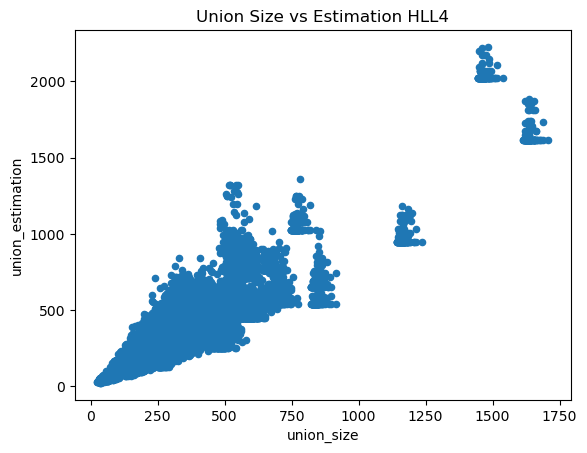

In [448]:
cross_hll_4_df.plot.scatter(x='union_size', y='union_estimation').set_title("Union Size vs Estimation HLL4")

Text(0.5, 1.0, 'Intersection Size vs Estimation HLL4')

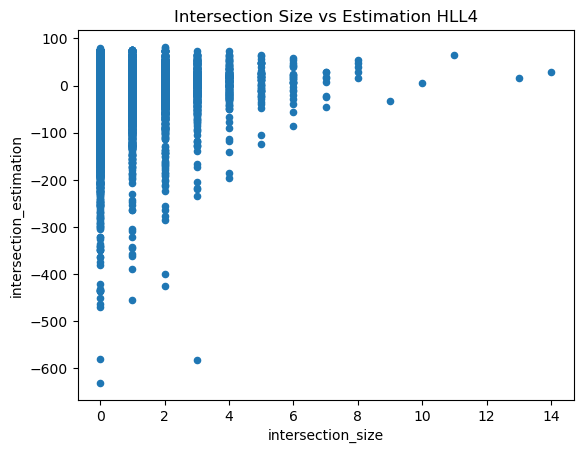

In [450]:
cross_hll_4_df.plot.scatter(x='intersection_size', y='intersection_estimation').set_title("Intersection Size vs Estimation HLL4")

Text(0.5, 1.0, 'Similarity Size vs Estimation HLL4')

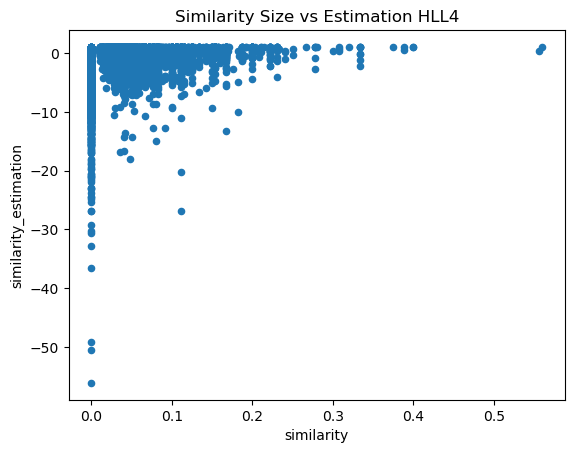

In [451]:
cross_hll_4_df.plot.scatter(x='similarity', y='similarity_estimation').set_title("Similarity Size vs Estimation HLL4")

In [455]:
cross_hll_4_df.to_pickle("./checkpoint/cross_hll_4_pitch_diff-ngram_5_set.pkl")

In [479]:
print_stats(cross_hll_4_df)

Union Mean Abs Error: 57.12154969992172
Union Std Abs Error: 61.384386631612564
Union Mean Relative Error: 20.05351835893027
Intersection Mean Size: 0.17305949864089398
Intersection Mean Abs Error: 23.3610583638083


---

Text(0.5, 1.0, 'Union Size vs Estimation HLL8')

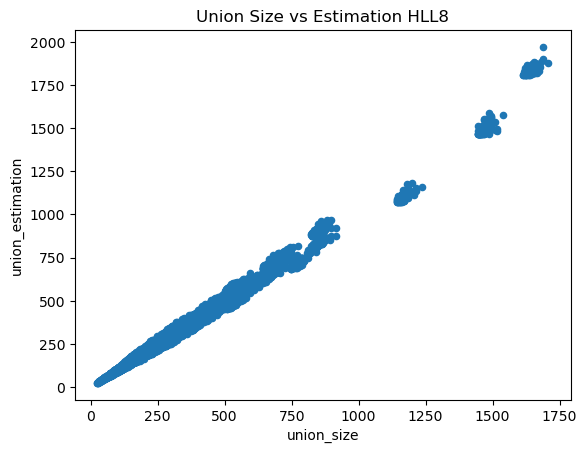

In [453]:
cross_hll_8_df = get_cross_for_hll('pitch_diff-ngram_5_set', 8)   
cross_hll_8_df.plot.scatter(x='union_size', y='union_estimation').set_title("Union Size vs Estimation HLL8")

Text(0.5, 1.0, 'Similarity Size vs Estimation HLL8')

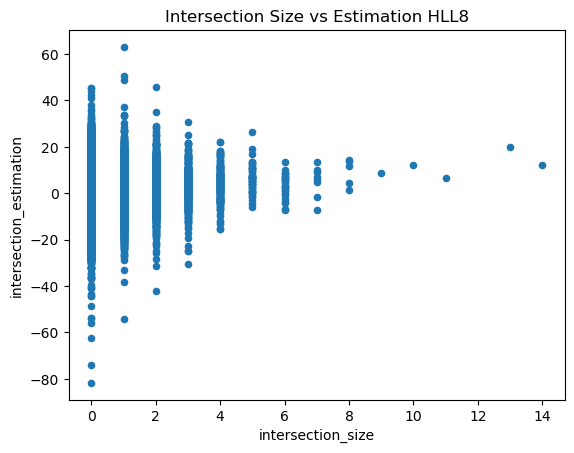

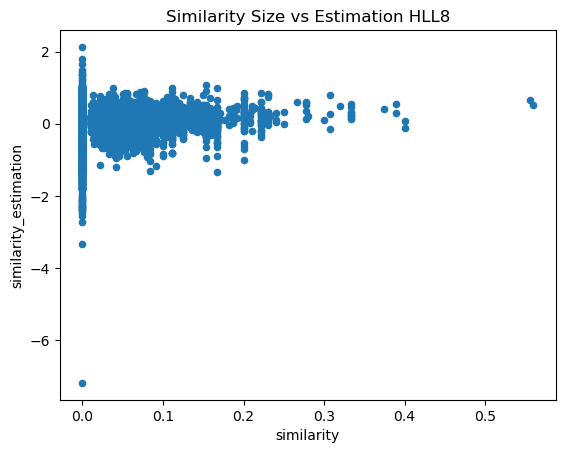

In [454]:
cross_hll_8_df.plot.scatter(x='intersection_size', y='intersection_estimation').set_title("Intersection Size vs Estimation HLL8")
cross_hll_8_df.plot.scatter(x='similarity', y='similarity_estimation').set_title("Similarity Size vs Estimation HLL8")

In [456]:
cross_hll_8_df.to_pickle("./checkpoint/cross_hll_8_pitch_diff-ngram_5_set.pkl")

In [482]:
print_stats(cross_hll_8_df)

Union Mean Abs Error: 11.203884086693193
Union Std Abs Error: 13.236942835793391
Union Mean Relative Error: 3.938587754640182
Intersection Mean Size: 0.17305949864089398
Intersection Mean Abs Error: 4.919667004337971


----

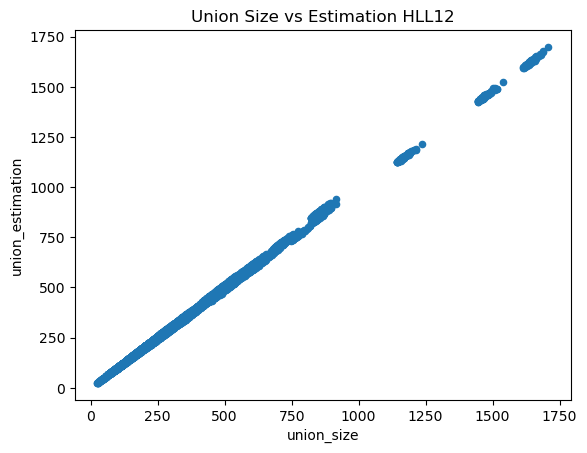

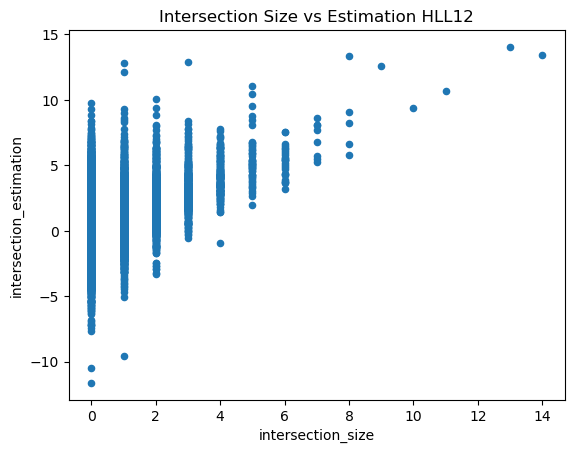

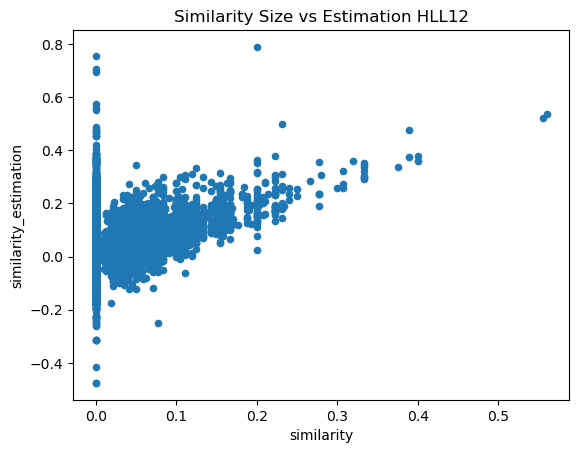

In [457]:
cross_hll_12_df = get_cross_for_hll('pitch_diff-ngram_5_set', 12)   
cross_hll_12_df.plot.scatter(x='union_size', y='union_estimation').set_title("Union Size vs Estimation HLL12")
cross_hll_12_df.plot.scatter(x='intersection_size', y='intersection_estimation').set_title("Intersection Size vs Estimation HLL12")
cross_hll_12_df.plot.scatter(x='similarity', y='similarity_estimation').set_title("Similarity Size vs Estimation HLL12")
cross_hll_12_df.to_pickle("./checkpoint/cross_hll_12_pitch_diff-ngram_5_set.pkl")

In [483]:
print_stats(cross_hll_12_df)

Union Mean Abs Error: 2.6487252718591687
Union Std Abs Error: 2.9093320128346583
Union Mean Relative Error: 0.9082914479851768
Intersection Mean Size: 0.17305949864089398
Intersection Mean Abs Error: 1.0031155721632197


---

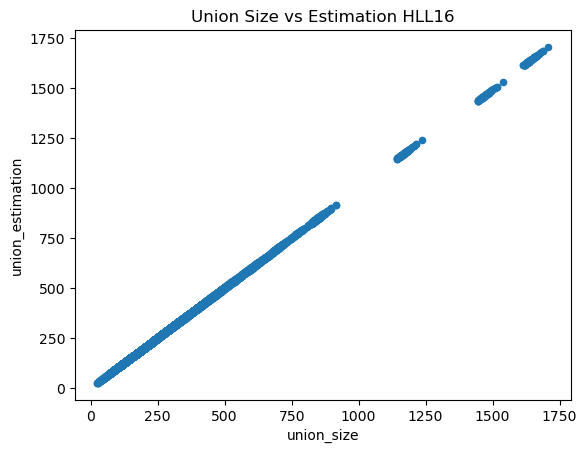

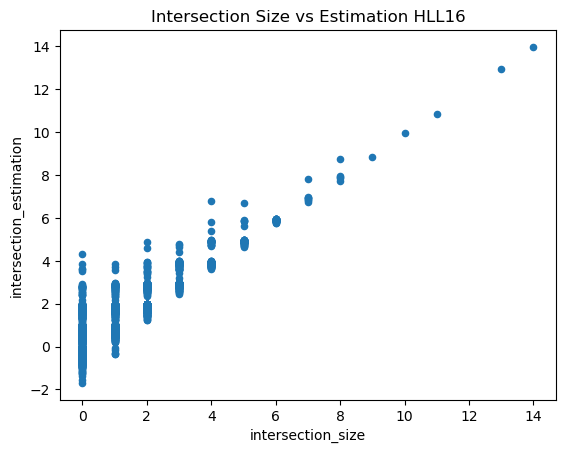

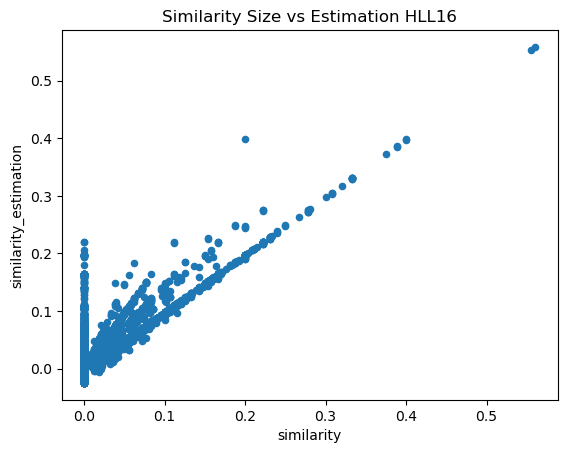

In [458]:
cross_hll_16_df = get_cross_for_hll('pitch_diff-ngram_5_set', 16)   
cross_hll_16_df.plot.scatter(x='union_size', y='union_estimation').set_title("Union Size vs Estimation HLL16")
cross_hll_16_df.plot.scatter(x='intersection_size', y='intersection_estimation').set_title("Intersection Size vs Estimation HLL16")
cross_hll_16_df.plot.scatter(x='similarity', y='similarity_estimation').set_title("Similarity Size vs Estimation HLL16")
cross_hll_16_df.to_pickle("./checkpoint/cross_hll_16_pitch_diff-ngram_5_set.pkl")

In [484]:
print_stats(cross_hll_16_df)

Union Mean Abs Error: 0.6451850087818489
Union Std Abs Error: 0.7302906756716017
Union Mean Relative Error: 0.2213312495780089
Intersection Mean Size: 0.17305949864089398
Intersection Mean Abs Error: 0.1847381125390397


## Memory Analysis

In [485]:
from pympler import asizeof

In [486]:
queries_sets_hll_df = pd.read_pickle("./queries_set_hll.pkl")
songs_sets_hll_df = pd.read_pickle("./songs_set_hll.pkl")

In [491]:
songs_sets_hll_df.head()

,Song ID,pitch_diff-ngram_5_set,UpSameDown-ngram_5_set,pitch_diff-ngram_8_set,UpSameDown-ngram_8_set,pitch_diff-ngram_10_set,UpSameDown-ngram_10_set,pitch_diff-ngram_12_set,UpSameDown-ngram_12_set,pitch_diff-multi_gram_5_10_set,...,pitch_diff-ngram_5_set_hll_16,UpSameDown-ngram_5_set_hll_16,pitch_diff-ngram_8_set_hll_16,UpSameDown-ngram_8_set_hll_16,pitch_diff-ngram_10_set_hll_16,UpSameDown-ngram_10_set_hll_16,pitch_diff-ngram_12_set_hll_16,UpSameDown-ngram_12_set_hll_16,pitch_diff-multi_gram_5_10_set_hll_16,UpSameDown-multi_gram_5_10_set_hll_16
0,1,"{(1, -1, 1, -2, -2), (-2, 3, -3, 2, -1), (2, 0...","{('U', 'U', 'S', 'U', 'S'), ('U', 'D', 'U', 'D...","{(3, -1, 1, -1, 0, -13, 9, -5), (-2, 2, -2, 0,...","{('U', 'D', 'S', 'S', 'S', 'U', 'D', 'D'), ('U...","{(-6, 6, 9, -12, 0, -2, 2, 0, -1, 1), (-1, 1, ...","{('S', 'D', 'U', 'D', 'U', 'S', 'S', 'D', 'U',...","{(-1, -2, 0, 1, 1, -1, -2, 1, 0, -1, 1, 3), (0...","{('S', 'D', 'U', 'U', 'D', 'U', 'S', 'S', 'D',...","{(-1, 2, -2, 1, 1, -1), (-5, 5, 0, -4, 5, 2, 0...",...,<hyperloglog.hll.HyperLogLog object at 0x2cfe8...,<hyperloglog.hll.HyperLogLog object at 0x2cfeb...,<hyperloglog.hll.HyperLogLog object at 0x2cfee...,<hyperloglog.hll.HyperLogLog object at 0x2cff2...,<hyperloglog.hll.HyperLogLog object at 0x2d3b8...,<hyperloglog.hll.HyperLogLog object at 0x50e4c...,<hyperloglog.hll.HyperLogLog object at 0x50e4f...,<hyperloglog.hll.HyperLogLog object at 0x50e51...,<hyperloglog.hll.HyperLogLog object at 0x50e54...,<hyperloglog.hll.HyperLogLog object at 0x50e57...
1,4,"{(2, 0, -4, -2, 0), (0, -1, 0, 0, 0), (5, -8, ...","{('U', 'D', 'S', 'S', 'U'), ('U', 'D', 'U', 'D...","{(-15, 15, -16, 7, -7, 0, 16, -1), (-8, 2, 17,...","{('D', 'D', 'U', 'D', 'U', 'D', 'U', 'D'), ('D...","{(-1, 2, -3, 2, 1, -2, 6, -7, 1, -1), (0, 25, ...","{('S', 'U', 'U', 'D', 'U', 'D', 'U', 'D', 'U',...","{(9, -15, 15, -16, 7, -7, 0, 16, -1, 1, 0, 25)...","{('S', 'U', 'U', 'D', 'S', 'U', 'U', 'D', 'U',...","{(2, 0, -4, -2, 0), (24, -24, -9, 9, -15, 15, ...",...,<hyperloglog.hll.HyperLogLog object at 0x2cfe8...,<hyperloglog.hll.HyperLogLog object at 0x2cfeb...,<hyperloglog.hll.HyperLogLog object at 0x2cfee...,<hyperloglog.hll.HyperLogLog object at 0x2cff2...,<hyperloglog.hll.HyperLogLog object at 0x2d3b8...,<hyperloglog.hll.HyperLogLog object at 0x50e4c...,<hyperloglog.hll.HyperLogLog object at 0x50e4f...,<hyperloglog.hll.HyperLogLog object at 0x50e51...,<hyperloglog.hll.HyperLogLog object at 0x50e54...,<hyperloglog.hll.HyperLogLog object at 0x50e57...
2,7,"{(-1, 2, 1, 0, -3), (8, -19, 12, -3, 7), (12, ...","{('U', 'U', 'S', 'U', 'S'), ('U', 'D', 'U', 'D...","{(-6, 0, 0, 4, 7, -19, 12, -7), (-10, 6, -5, 5...","{('D', 'U', 'D', 'U', 'S', 'S', 'U', 'D'), ('D...","{(1, 4, -4, 1, -1, -1, -2, -5, 1, -12), (1, 0,...","{('D', 'U', 'D', 'U', 'S', 'S', 'U', 'D', 'U',...","{(5, -2, -5, 7, -4, -6, 10, 0, -7, 7, -4, 6), ...","{('S', 'U', 'D', 'U', 'D', 'U', 'D', 'D', 'U',...","{(-10, 6, -5, 5, 4, -5, -7, 12), (-12, 0, 0, 1...",...,<hyperloglog.hll.HyperLogLog object at 0x2cfe8...,<hyperloglog.hll.HyperLogLog object at 0x2cfeb...,<hyperloglog.hll.HyperLogLog object at 0x2cfee...,<hyperloglog.hll.HyperLogLog object at 0x2cff2...,<hyperloglog.hll.HyperLogLog object at 0x2d3b8...,<hyperloglog.hll.HyperLogLog object at 0x50e4c...,<hyperloglog.hll.HyperLogLog object at 0x50e4f...,<hyperloglog.hll.HyperLogLog object at 0x50e52...,<hyperloglog.hll.HyperLogLog object at 0x50e54...,<hyperloglog.hll.HyperLogLog object at 0x50e57...
3,14,"{(12, -14, 17, -15, -2), (5, -2, 1, 4, 1), (-2...","{('U', 'D', 'U', 'D', 'S'), ('D', 'U', 'D', 'D...","{(4, -1, -4, -2, 3, 5, -2, 1), (3, 2, 4, -5, -...","{('U', 'S', 'U', 'S', 'U', 'D', 'D', 'U'), ('D...","{(1, 2, 1, -9, 0, 5, 3, -2, -1, 1), (0, 0, 0, ...","{('D', 'U', 'D', 'D', 'U', 'U', 'U', 'D', 'U',...","{(13, -15, -2, -1, 5, -3, -5, 0, 8, 5, -1, 1),...","{('D', 'U', 'D', 'U', 'U', 'U', 'U', 'D', 'S',...","{(-2, -1, 5, -3, -5, 0), (-1, 1, -5, 3, -3, -2...",...,<hyperloglog.hll.HyperLogLog object at 0x2c

In [497]:
columns_songs = songs_sets_hll_df.columns.tolist()
columns_songs.remove('Song ID')
columns_songs
cols_series_size = []
songs_memory_df = songs_sets_hll_df.copy()
cols_series_size.append(songs_memory_df['Song ID'])
for c in columns_songs:
    size_col = c+"_size"
    s = songs_memory_df[c].apply(lambda x: asizeof.asizeof(x))
    cols_series_size.append(s)
songs_memory_df = pd.concat(cols_series_size, axis=1)

In [502]:
songs_memory_df

,Song ID,pitch_diff-ngram_5_set,UpSameDown-ngram_5_set,pitch_diff-ngram_8_set,UpSameDown-ngram_8_set,pitch_diff-ngram_10_set,UpSameDown-ngram_10_set,pitch_diff-ngram_12_set,UpSameDown-ngram_12_set,pitch_diff-multi_gram_5_10_set,...,pitch_diff-ngram_5_set_hll_16,UpSameDown-ngram_5_set_hll_16,pitch_diff-ngram_8_set_hll_16,UpSameDown-ngram_8_set_hll_16,pitch_diff-ngram_10_set_hll_16,UpSameDown-ngram_10_set_hll_16,pitch_diff-ngram_12_set_hll_16,UpSameDown-ngram_12_set_hll_16,pitch_diff-multi_gram_5_10_set_hll_16,UpSameDown-multi_gram_5_10_set_hll_16
0,1,24096,16888,26008,27320,27512,30352,28984,32152,235184,...,576528,576496,576496,576496,576496,576528,576560,576528,576592,576592
1,4,15584,7864,16224,17144,16816,18184,17376,18824,79312,...,576496,576560,576528,576432,576496,576464,576496,576528,576560,576560
2,7,58680,16488,62216,35384,64840,68448,67464,72520,304128,...,576624,576560,576528,576528,576592,576560,576528,576624,576656,576592
3,14,29048,7784,32144,28472,34312,35344,36336,39432,270696,...,576528,576528,576592,576496,576560,576528,576560,576528,576656,576560
4,15,20344,14888,21536,22904,22672,25152,23760,26328,110848,...,576528,576528,576496,576496,576528,576560,576528,576528,576624,576624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,2419,18328,15528,19288,21368,20200,22344,20992,23192,97424,...,576496,576560,576496,576496,576496,576496,576560,576528,576592,576560
477,2421,20064,16008,21296,23384,22360,24840,23240,25992,108792,...,576528,576560,576528,576528,576528,576528,576560,576496,576656,576592
478,2424,15792,15208,16656,18296,17296,18912,17728,19496,81352,...,576496,576496,576528,576528,576464,576496,576464,576464,576592,576560
479,2429,23456,16248,25368,25784,26752,29000,28160,31144,231704,...,576496,576560,576560,576528,576528,576496,576528,576496,576624,576592


In [545]:
songs_memory_mean_df = songs_memory_df.describe().drop(columns=['Song ID']).transpose().sort_values(by="mean")[['mean']]
songs_memory_mean_df["method"] = songs_memory_mean_df.index.str.split("_set").str[0]
def get_data_structure(s):
    if(s.endswith("_set")):
        return "set"
    return s.split("_set_")[1]
songs_memory_mean_df.reset_index(inplace=True)
songs_memory_mean_df["data_structure"] = songs_memory_mean_df["index"].apply(get_data_structure)
songs_memory_mean_df.rename(columns={'mean':'mean_memory_in_bytes'}, inplace=True)

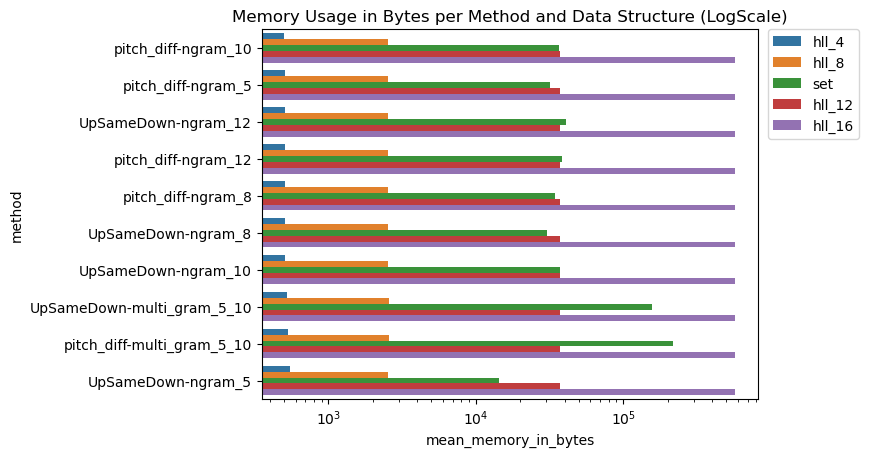

In [551]:
g = sns.barplot(songs_memory_mean_df,  x='mean_memory_in_bytes',y='method', hue="data_structure")
g.set_xscale("log")
g.set_title("Memory Usage in Bytes per Method and Data Structure (LogScale)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [575]:
songs_memory_usage_df = songs_memory_df.melt(id_vars=['Song ID'],value_name='memory_usage',var_name='method_id')
songs_memory_usage_df["method"] = songs_memory_usage_df['method_id'].str.split("_set").str[0]
songs_memory_usage_df["datastructure"] = songs_memory_usage_df['method_id'].apply(get_data_structure)
songs_memory_usage_df

,Song ID,method_id,memory_usage,method,datastructure
0,1,pitch_diff-ngram_5_set,24096,pitch_diff-ngram_5,set
1,4,pitch_diff-ngram_5_set,15584,pitch_diff-ngram_5,set
2,7,pitch_diff-ngram_5_set,58680,pitch_diff-ngram_5,set
3,14,pitch_diff-ngram_5_set,29048,pitch_diff-ngram_5,set
4,15,pitch_diff-ngram_5_set,20344,pitch_diff-ngram_5,set
...,...,...,...,...,...
23645,2419,UpSameDown-multi_gram_5_10_set_hll_16,576560,UpSameDown-multi_gram_5_10,hll_16
23646,2421,UpSameDown-multi_gram_5_10_set_hll_16,576592,UpSameDown-multi_gram_5_10,hll_16
23647,2424,UpSameDown-multi_gram_5_10_set_hll_16,576560,UpSameDown-multi_gram_5_10,hll_16
23648,2429,UpSameDown-multi_gram_5_10_set_hll_16,576592,UpSameDown-multi_gram_5_10,hll_16


In [579]:
songs_memory_usage_df.drop(columns=['method_id'], inplace=True)

In [580]:
set_based_songs_memory_usage_df = songs_memory_usage_df[songs_memory_usage_df["datastructure"]=='set'].copy()
hll_based_songs_memory_usage_df = songs_memory_usage_df[songs_memory_usage_df["datastructure"]!='set'].copy()


In [584]:
memory_comparisson_df = pd.merge(hll_based_songs_memory_usage_df,set_based_songs_memory_usage_df,how='left', suffixes=("_hll","_set"), on=["Song ID","method"])

In [599]:
memory_comparisson_df.head()

,Song ID,memory_usage_hll,method,datastructure_hll,memory_usage_set,datastructure_set
0,1,496,pitch_diff-ngram_5,hll_4,24096,set
1,4,528,pitch_diff-ngram_5,hll_4,15584,set
2,7,560,pitch_diff-ngram_5,hll_4,58680,set
3,14,496,pitch_diff-ngram_5,hll_4,29048,set
4,15,528,pitch_diff-ngram_5,hll_4,20344,set


In [607]:
memory_t_test_results=[]
methods = memory_comparisson_df["method"].unique()
hll_datastructure_list = memory_comparisson_df["datastructure_hll"].unique()
for hll_ds in hll_datastructure_list:
    for m in methods:
        data = memory_comparisson_df[(memory_comparisson_df["method"] == m) &(memory_comparisson_df["datastructure_hll"] == hll_ds)]
        memory_usage_hll_data = data['memory_usage_hll']
        memory_usage_set_data = data['memory_usage_set']
        res = stats.ttest_rel(memory_usage_set_data,memory_usage_hll_data, alternative='two-sided')
        memory_usage_hll_mean = np.mean(memory_usage_hll_data)
        memory_usage_set_mean = np.mean(memory_usage_set_data)
        memory_t_test_results.append({'p_value':res.pvalue,
                                'method':m,
                               'data_structure': hll_ds,
                               'memory_usage_hll_mean':memory_usage_hll_mean,
                               'memory_usage_set_mean':memory_usage_set_mean})
memory_t_test__df = pd.DataFrame.from_records(memory_t_test_results)

In [608]:
memory_t_test__df["reject_null"] = memory_t_test__df["p_value"]<0.05
memory_t_test__df

,p_value,method,data_structure,memory_usage_hll_mean,memory_usage_set_mean,reject_null
0,2.290206e-113,pitch_diff-ngram_5,hll_4,506.689218,31837.496829,True
1,5.610390e-250,UpSameDown-ngram_5,hll_4,551.205074,14369.099366,True
2,1.120064e-113,pitch_diff-ngram_8,hll_4,508.718816,34505.386892,True
3,1.508430e-160,UpSameDown-ngram_8,hll_4,509.192389,30454.917548,True
4,7.067839e-115,pitch_diff-ngram_10,hll_4,504.118393,36496.642706,True
5,5.389404e-132,UpSameDown-ngram_10,hll_4,512.169133,37326.410148,True
6,2.721590e-115,pitch_diff-ngram_12,hll_4,507.839323,38218.892178,True
7,2.197431e-120,UpSameDown-ngram_12,hll_4,506.689218,41004.397463,True
8,1.767247e-137,pitch_diff-multi_gram_5_10,hll_4,532.871036,218892.600423,True
9,3.516191e-161,UpSameDown-multi_gram_5_10,hll_4,524.617336,157724.397463,True


In [609]:
memory_t_test__df.to_csv("memory_t_test.csv")

# Sequences Analysis

In [328]:
queries_sequence_df = pd.read_pickle("./queries_sequence_df.pkl")
songs_sequence_df = pd.read_pickle("./songs_sequence_df.pkl")

count    3930.000000
mean       -0.008906
std         3.027182
min       -19.000000
25%        -2.000000
50%         0.000000
75%         2.000000
max        19.000000
dtype: float64

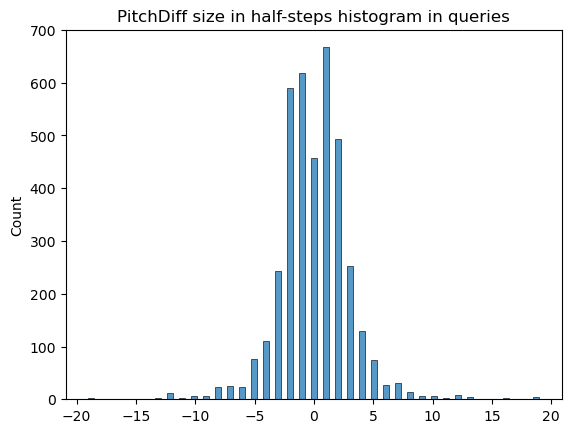

In [352]:
diff_half_steps = queries_sequence_df['pitch_diff'].explode().tolist()
sns.histplot(diff_half_steps).set(title='PitchDiff size in half-steps histogram in queries')
pd.Series(diff_half_steps).describe()

In [356]:
len(list(filter(lambda x: x>=-5 and x<=5,diff_half_steps)))/len(diff_half_steps)

0.94529262086514

count    125279.000000
mean          0.006960
std           7.649753
min         -61.000000
25%          -3.000000
50%           0.000000
75%           3.000000
max          63.000000
dtype: float64

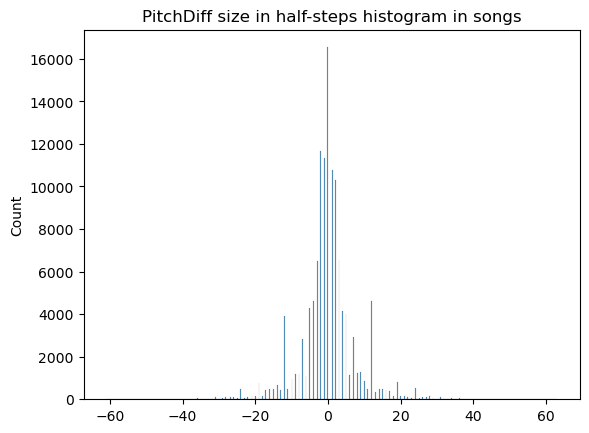

In [353]:
diff_half_steps_songs = songs_sequence_df['pitch_diff'].explode().tolist()
sns.histplot(diff_half_steps_songs).set(title='PitchDiff size in half-steps histogram in songs')
pd.Series(diff_half_steps_songs).describe()

In [357]:
len(list(filter(lambda x: x>=-5 and x<=5,diff_half_steps_songs)))/len(diff_half_steps_songs)

0.7247423750189577

## Query vs Song Set Size

In [613]:
queries_set_df = pd.read_pickle("./queries_sets.pkl")
songs_set_df = pd.read_pickle("./songs_sets.pkl")

In [631]:
queries_method_set_df = queries_set_df.drop(columns=["Song ID","Query ID"]).melt(var_name='method',value_name='set')
queries_method_set_df["size"] = queries_method_set_df["set"].apply(lambda x: len(x))
queries_method_size_set = queries_method_set_df.groupby("method")['size'].mean().to_frame()

In [632]:
songs_method_set_df = songs_set_df.drop(columns=["Song ID"]).melt(var_name='method',value_name='set')
songs_method_set_df["size"] = songs_method_set_df["set"].apply(lambda x: len(x))
songs_method_size_set = songs_method_set_df.groupby("method")['size'].mean().to_frame()

In [638]:
set_size_df = pd.merge(queries_method_size_set, songs_method_size_set,left_index=True, right_index=True, suffixes=("_query","_song"))

In [644]:
set_size_df['size_ratio'] = set_size_df['size_song']/set_size_df['size_query']
set_size_df.reset_index().to_csv('set_size_query_song_ratio.csv')

In [642]:
set_size_df.mean()

size_query     50.329661
size_song     434.779418
size_ratio      8.916082
dtype: float64